In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

In [2]:
df = pd.read_csv('./gld_price_data.csv')

In [3]:
df.head(6)

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099
5,1/9/2008,1409.130005,86.550003,75.250000,15.520,1.466405


In [4]:
df.tail(6)

,Date,SPX,GLD,USO,SLV,EUR/USD
2284,5/7/2018,2672.629883,124.570000,14.1000,15.5200,1.193374
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [5]:
df.shape

(2290, 6)

This dataset contain 2290 rows and 6 columns.

In [6]:
print("This dataset has ", df.columns, " columns")

This dataset has  Index(['Date', 'SPX', 'GLD', 'USO', 'SLV', 'EUR/USD'], dtype='object')  columns


In [7]:
df.duplicated().sum()

0

This dataset doesn't contain duplicate values.

In [8]:
df.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

This dataset doesn't contain null values.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [10]:
df.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


SPX column...........................


C:\Users\pinil\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


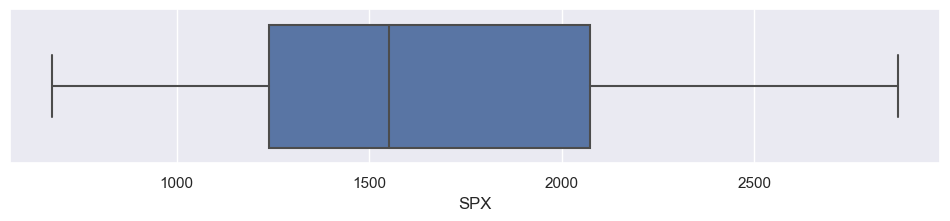

GLD column...........................


C:\Users\pinil\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


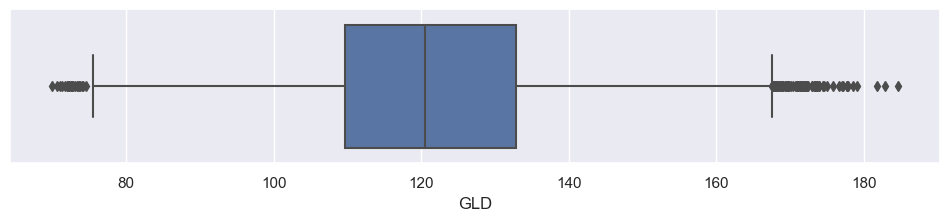

USO column...........................


C:\Users\pinil\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


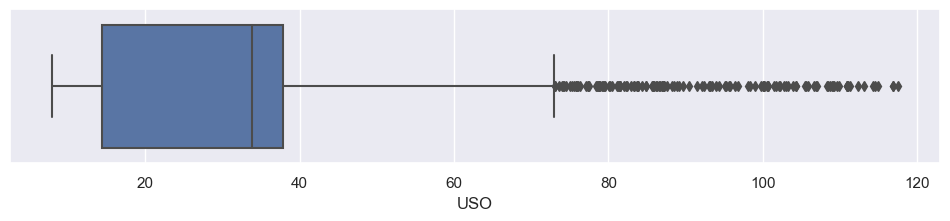

SLV column...........................


C:\Users\pinil\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


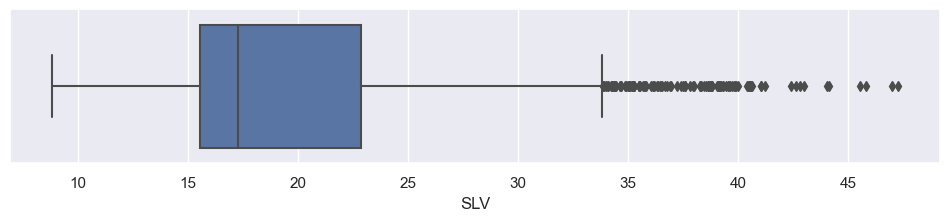

C:\Users\pinil\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


EUR/USD column...........................


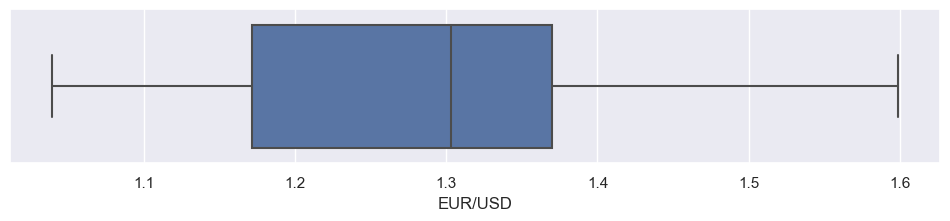

In [11]:
c = ['SPX', 'GLD', 'USO', 'SLV', 'EUR/USD']

for i in c:
    print(i, "column...........................")
    sns.set()
    plt.figure(figsize = (12, 2))
    sns.boxplot(df[i])
    plt.show()

<Figure size 2000x2000 with 0 Axes>

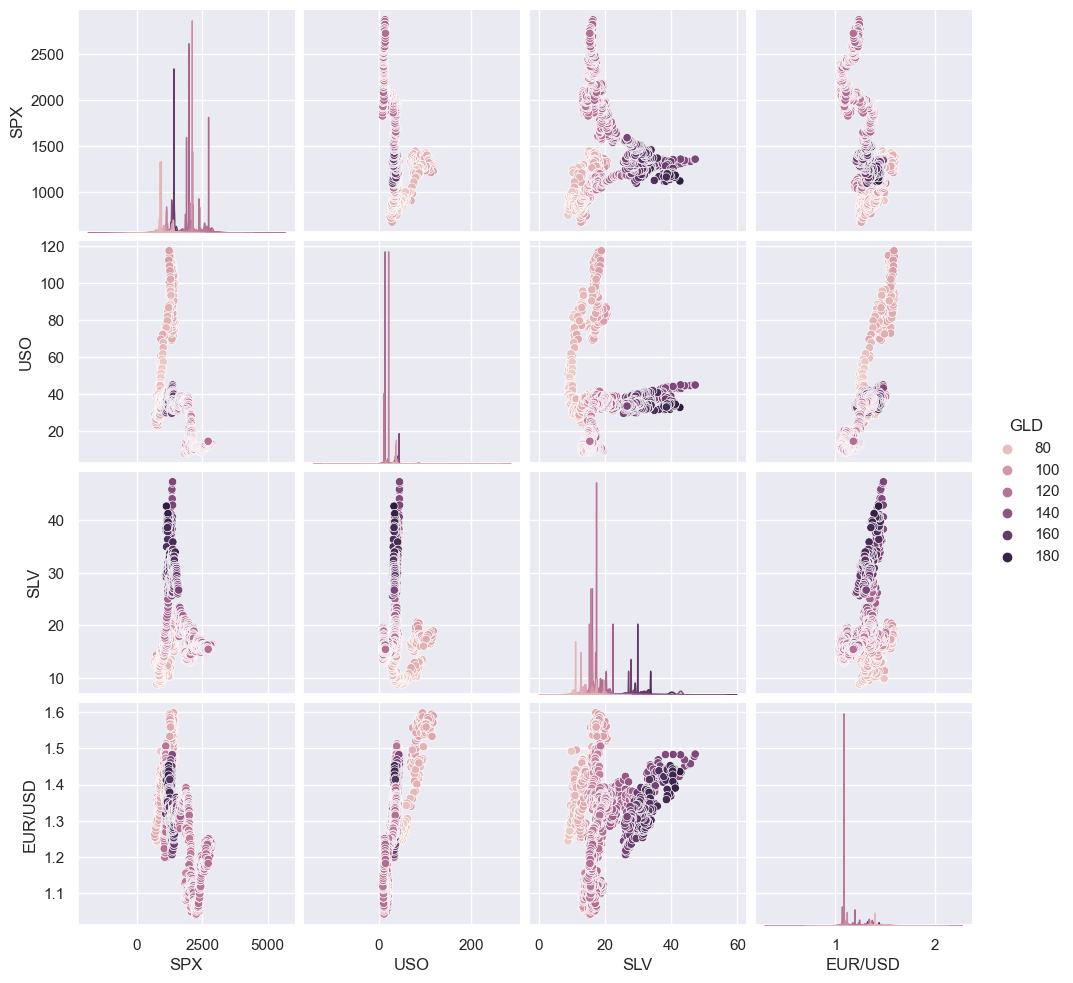

In [12]:
sns.set()
plt.figure(figsize = (20, 20))
sns.pairplot(df, hue = 'GLD')
plt.show()

array([[<AxesSubplot:title={'center':'SPX'}>,
        <AxesSubplot:title={'center':'GLD'}>],
       [<AxesSubplot:title={'center':'USO'}>,
        <AxesSubplot:title={'center':'SLV'}>],
       [<AxesSubplot:title={'center':'EUR/USD'}>, <AxesSubplot:>]],
      dtype=object)

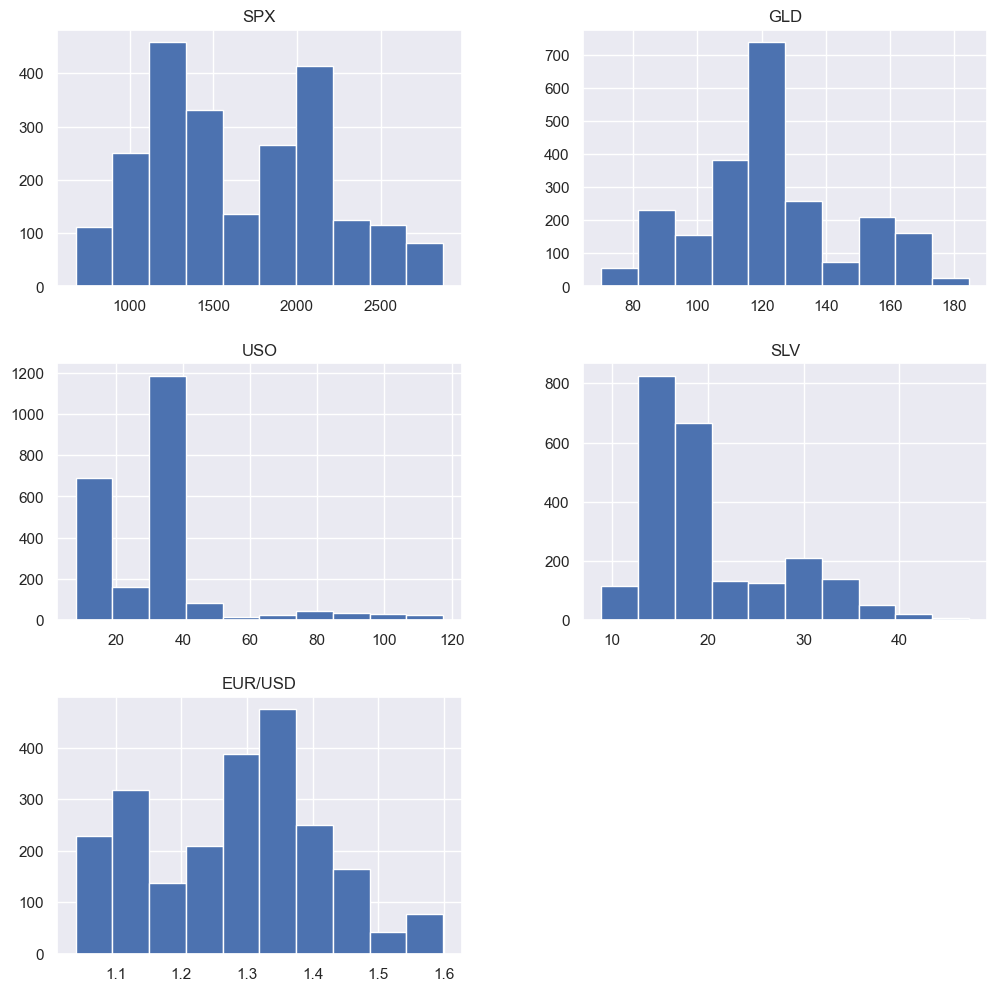

In [13]:
df.hist(figsize = (12, 12))

In [14]:
df.drop(columns = 'Date', axis = 1, inplace = True)
df.shape

(2290, 5)

Now dataset contain 2290 rows and 5 columns.

              SPX       GLD       USO       SLV   EUR/USD
SPX      1.000000  0.049345 -0.591573 -0.274055 -0.672017
GLD      0.049345  1.000000 -0.186360  0.866632 -0.024375
USO     -0.591573 -0.186360  1.000000  0.167547  0.829317
SLV     -0.274055  0.866632  0.167547  1.000000  0.321631
EUR/USD -0.672017 -0.024375  0.829317  0.321631  1.000000
 


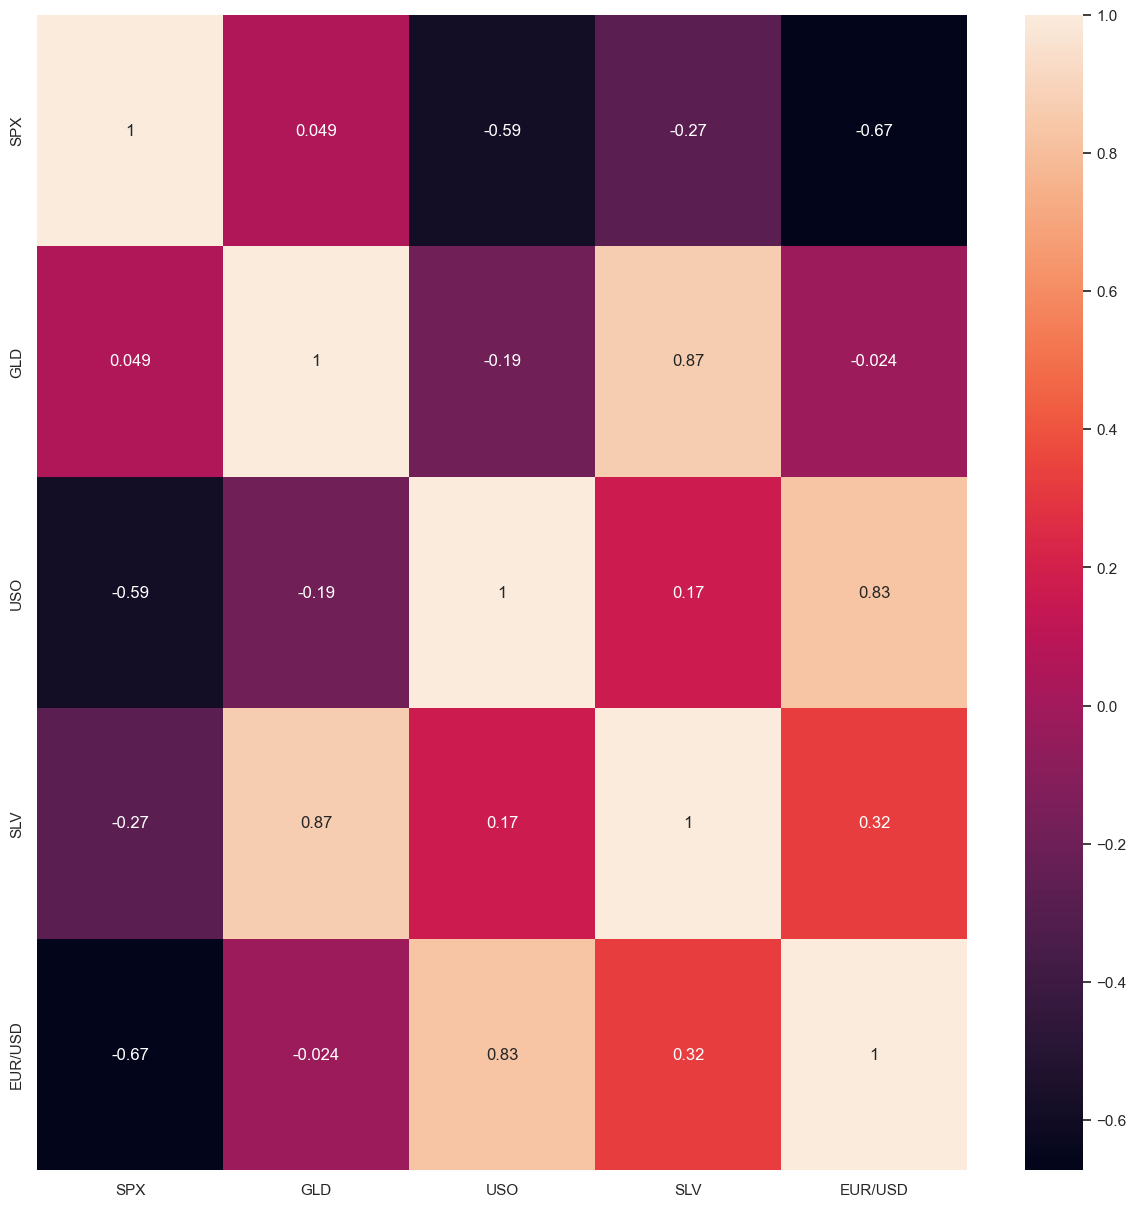

In [15]:
c = df.corr()
print(c)
print(" ")

sns.set()
plt.figure(figsize = (15, 15))
sns.heatmap(c, annot = True)
plt.show()

In [16]:
x = df.drop(columns = 'GLD', axis = 1)
y = df['GLD']

In [17]:
x.head(6)

,SPX,USO,SLV,EUR/USD
0,1447.160034,78.470001,15.180,1.471692
1,1447.160034,78.370003,15.285,1.474491
2,1411.630005,77.309998,15.167,1.475492
3,1416.180054,75.500000,15.053,1.468299
4,1390.189941,76.059998,15.590,1.557099
5,1409.130005,75.250000,15.520,1.466405


In [18]:
y.head(6)

0    84.860001
1    85.570000
2    85.129997
3    84.769997
4    86.779999
5    86.550003
Name: GLD, dtype: float64

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, random_state = 10)

In [20]:
print(x_train.shape)
print("x_train has 1832 rows and 4 columns")
print("---------------------------------------------------------------------------------------------------------")
print(y_train.shape)
print("y_train has 1832 rows and 1 column")
print("---------------------------------------------------------------------------------------------------------")
print(x_test.shape)
print("x_test has 458 rows and 4 columns")
print("---------------------------------------------------------------------------------------------------------")
print(y_test.shape)
print("y_test has 458 rows and 1 column")
print("---------------------------------------------------------------------------------------------------------")

(1832, 4)
x_train has 1832 rows and 4 columns
---------------------------------------------------------------------------------------------------------
(1832,)
y_train has 1832 rows and 1 column
---------------------------------------------------------------------------------------------------------
(458, 4)
x_test has 458 rows and 4 columns
---------------------------------------------------------------------------------------------------------
(458,)
y_test has 458 rows and 1 column
---------------------------------------------------------------------------------------------------------


In [21]:
sc = StandardScaler()
sc.fit(x_train)

StandardScaler()

In [22]:
x_train = sc.transform(x_train)
x_test = sc.transform(x_test)

In [23]:
x_train = pd.DataFrame(x_train, columns = ['SPX', 'USO', 'SLV', 'EUR/USD'])
x_test = pd.DataFrame(x_test, columns = ['SPX', 'USO', 'SLV', 'EUR/USD'])

In [24]:
#DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(x_train, y_train)

DecisionTreeRegressor()

In [25]:
dtr_train_data_pre = dtr.predict(x_train)
dtr_test_data_pre = dtr.predict(x_test)

dtr_train_data_r2 = r2_score(y_train, dtr_train_data_pre)
dtr_test_data_r2 = r2_score(y_test, dtr_test_data_pre)

print("r2 score for train data using Decision Tree Regressor = ", dtr_train_data_r2)
print("r2 score for test data using Decision Tree Regressor = ", dtr_test_data_r2)

r2 score for train data using Decision Tree Regressor =  1.0
r2 score for test data using Decision Tree Regressor =  0.9824686846123148


In [26]:
#Random Forest Regressor 
rfr = RandomForestRegressor(n_estimators=100)
rfr.fit(x_train, y_train)

RandomForestRegressor()

In [27]:
rfr_train_data_pre = rfr.predict(x_train)
rfr_test_data_pre = rfr.predict(x_test)

rfr_train_data_r2 = r2_score(y_train, rfr_train_data_pre)
rfr_test_data_r2 = r2_score(y_test, rfr_test_data_pre)

print("r2 score for train data using Random Forest Regressor = ", rfr_train_data_r2)
print("r2 score for test data using Random Forest Regressor = ", rfr_test_data_r2)

r2 score for train data using Random Forest Regressor =  0.9983549420019721
r2 score for test data using Random Forest Regressor =  0.9897343436488621


In [28]:
#Linear Regressor
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [29]:
lr_train_data_pre = lr.predict(x_train)
lr_test_data_pre = lr.predict(x_test)

lr_train_data_r2 = r2_score(y_train, lr_train_data_pre)
lr_test_data_r2 = r2_score(y_test, lr_test_data_pre)

print("r2 score for train data using linear regression = ", lr_train_data_r2)
print("r2 score for test data using linear regression = ", lr_test_data_r2)

r2 score for train data using linear regression =  0.8792902894467478
r2 score for test data using linear regression =  0.8883200099090237


In [30]:
#K-Neighbors Regressor
knn = KNeighborsRegressor()
knn.fit(x_train, y_train)

KNeighborsRegressor()

In [31]:
knn_train_data_pre = knn.predict(x_train)
knn_test_data_pre = knn.predict(x_test)

knn_train_data_r2 = r2_score(y_train, knn_train_data_pre)
knn_test_data_r2 = r2_score(y_test, knn_test_data_pre)

print("r2 score for train data using K-Neighbors Regressor = ", knn_train_data_r2)
print("r2 score for test data using K-Neighbors Regressor = ", knn_test_data_r2)

r2 score for train data using K-Neighbors Regressor =  0.9941716537760947
r2 score for test data using K-Neighbors Regressor =  0.9939142478872681


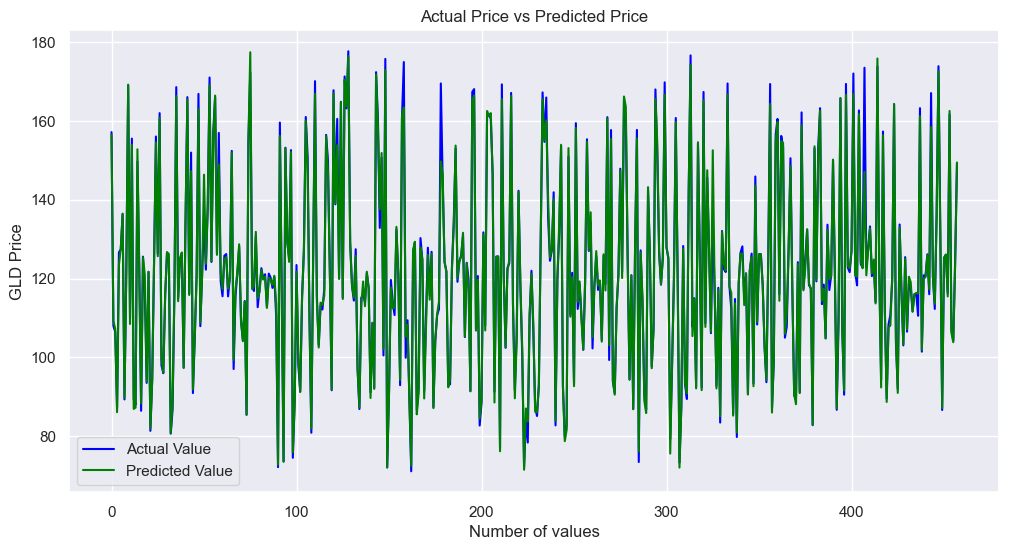

In [37]:
#Compare the Actual Values and Predicted Values in a Plot using RandomForestRegressor
y_test = list(y_test)

plt.figure(figsize = (12, 6))
plt.plot(y_test, color='blue', label = 'Actual Value')
plt.plot(rfr_test_data_pre, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()

In [38]:
input_data = [1447.160034, 78.470001, 15.180, 1.471692]
input_arr = np.asarray(input_data).reshape(1, -1)
data_pre = rfr.predict(input_arr)
print("Predicted value = ", data_pre)

Predicted value =  [150.23290397]


C:\Users\pinil\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
